Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [367]:
# Подгрузим нужные нам библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

# ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# pandas_profiling
from pandas_profiling import ProfileReport

In [368]:
# Получаем файл
df = pd.read_csv('taxi.csv')
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [369]:
# Загрузим полное описание датасета
profile = ProfileReport(df,minimal=True)
#profile.to_file(outputfile="./report.html")
#profile.to_widgets()

In [370]:
profile

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


_*В датасете отсутствуют все неопределенные значения*_

In [372]:
# Узнаем основные статистические параметры
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


### driver_response 

Имеет дискретное распределение (Бернулли), значения в столбце - классы ответов: 0 и 1, которые нужно предсказать. Количество элементов в классах: 0 - 50752 (50,8% от общего количества значений), 1 - 49248 (49,2% от общего количества значений).

0    50752
1    49248
Name: driver_response, dtype: int64

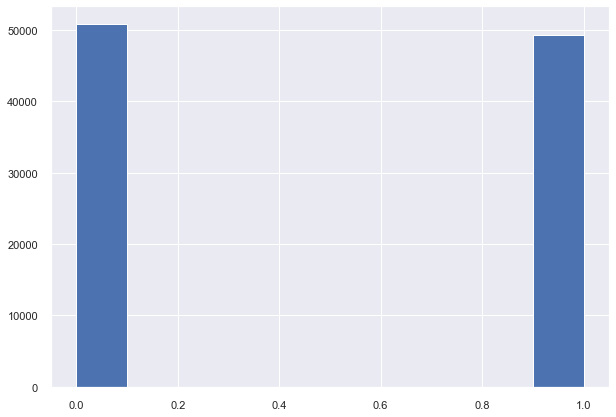

In [373]:
df['driver_response'].hist()
df['driver_response'].value_counts()

### weekday_key

Категориальная переменная, обозначающая номер дня недели. 

In [374]:
# weekday_key

len(df.weekday_key.unique())

7

In [375]:
df.weekday_key.unique()

array([5, 6, 2, 4, 3, 1, 0])

In [376]:
df.weekday_key.value_counts()

5    19284
6    15466
0    14411
4    13290
1    13089
2    12859
3    11601
Name: weekday_key, dtype: int64

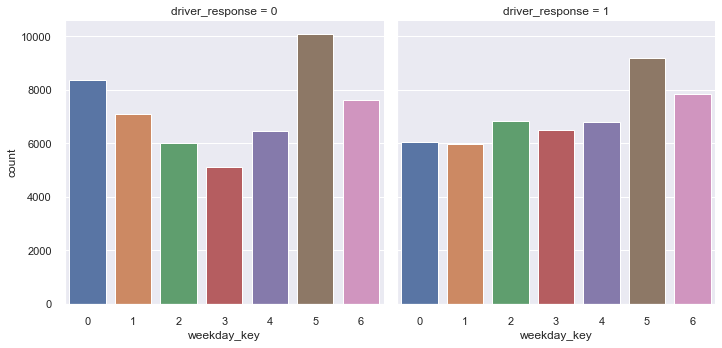

In [377]:
# Распределение откликов водителей по дням недели (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="weekday_key", data=df, col="driver_response", kind="count")

In [378]:
# класфицируем признаки

In [379]:
def weekend_classification(num):
    if num == 6 or num == 0: return 1
    else: return 0
    
def friday_classification(num):
    if num == 5: return 1
    else: return 0

In [380]:
df["is_weekend"] = df["weekday_key"].apply(weekend_classification)
df["is_friday"] = df["weekday_key"].apply(friday_classification)

##  hour_key

Номер часа в сутках. Значения в столбце - числа от 0 до 23. Судя по графику распределения, большее число элементов имеют вечерние часы: 23 - 8184, 21 - 7398, 22 - 6881, 0 - 6646, 20 - 6566. Можно создать новые признаки, обозначающие интервалы времени в сутках. Например, 0-4 — is_night; 4-11 — is_morning; 12-17 — is_daytime; 17-0 — is_evening.

In [381]:
# hour_key
len(df.hour_key.unique())

24

In [382]:
df.hour_key.unique()

array([20, 14,  6, 16, 15, 11,  7, 10, 12,  8,  9, 21, 17, 23, 13, 18,  5,
       19, 22,  0,  2,  3,  1,  4])

In [383]:
df.hour_key.value_counts()

23    8184
21    7398
22    6881
0     6646
20    6566
19    6369
18    5889
17    5028
16    4500
15    4249
14    3584
8     3550
1     3467
13    3355
9     3298
12    3169
11    2890
10    2840
7     2482
2     2275
4     2193
5     1809
3     1768
6     1610
Name: hour_key, dtype: int64

Text(0.5, 0, 'час')

Text(0, 0.5, 'Количество элементов')

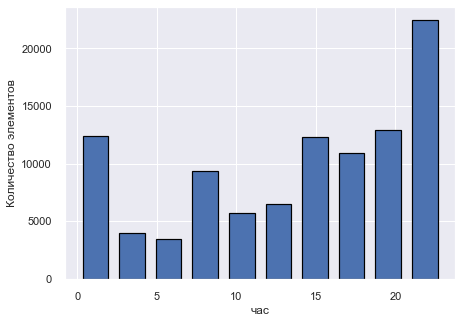

In [384]:
rcParams['figure.figsize'] = 7,5

df.hour_key.hist(edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)
plt.xlabel('час')
plt.ylabel('Количество элементов')

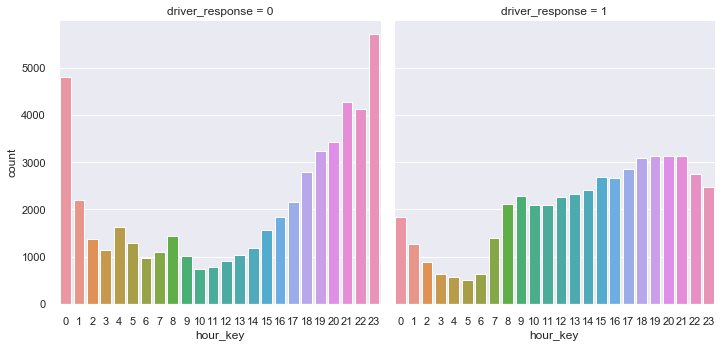

In [385]:
# Распределение откликов водителей по часам заказа

sns.set(style="darkgrid")
sns.catplot(x="hour_key", data=df, col="driver_response", kind="count")

In [386]:
def time_night_classification(num):
    night = [0, 1, 2, 3]
    if num in night: return 1
    else: return 0
    
def time_morning_classification(num):
    morning = [4, 5, 6, 7, 8, 9, 10, 11]
    if num in morning: return 1
    else: return 0
    
def time_daytime_classification(num):
    daytime = [12, 13, 14, 15, 16]
    if num in daytime: return 1
    else: return 0    
    
def time_evening_classification(num):
    evening = [17, 18, 19, 20, 21, 22, 23]
    if num in evening: return 1
    else: return 0

In [387]:
df["is_night"] = df["hour_key"].apply(time_night_classification)
df["is_morning"] = df["hour_key"].apply(time_morning_classification)
df["is_daytime"] = df["hour_key"].apply(time_daytime_classification)
df["is_evening"] = df["hour_key"].apply(time_evening_classification)

In [388]:
df.drop(columns=['weekday_key', 'hour_key'], inplace=True)

### driver_gk

В датасете 439 уникальных водителей. При этом, у них существенно разная активность: у некоторых водителей более 2000 элементов, а у других чуть более 50 элементов.

In [389]:
# driver_gk

len(df.driver_gk.unique())
df.driver_gk.value_counts()

439

1421    3014
1060    2780
1126    2328
4490    1784
2442    1588
        ... 
2844      52
1978      52
689       52
854       51
3242      50
Name: driver_gk, Length: 439, dtype: int64

Text(0.5, 1.0, 'График для параметра driver_gk')

Text(0.5, 0, 'Уникальный номер водителя')

Text(0, 0.5, 'Количество элементов')

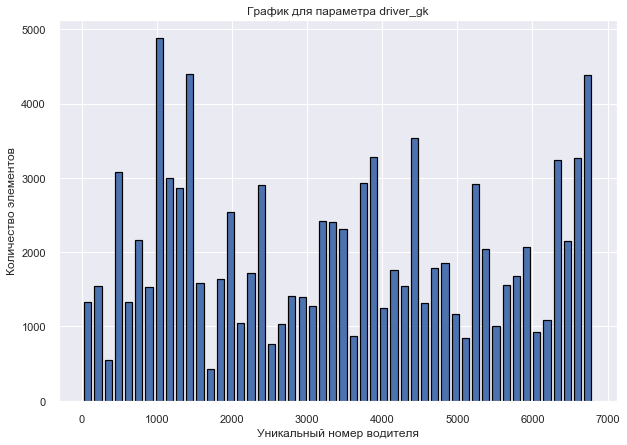

In [390]:
rcParams['figure.figsize'] = 10,7

df.driver_gk.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра driver_gk')
plt.xlabel('Уникальный номер водителя')
plt.ylabel('Количество элементов')

### order_gk

В столбце 81435 уникальных чисел. При этом, у них различается количество элементов: у некоторых order более 10 элементов, а у других 1 элемент. Можно создать новые признаки, обозначающие популярность order в системе.


In [391]:
productivity_df = pd.DataFrame({'driver_gk':df.driver_gk.value_counts().index, 'working_times':df.driver_gk.value_counts().values})

productivity_df.head()
productivity_df.shape

,driver_gk,working_times
0,1421,3014
1,1060,2780
2,1126,2328
3,4490,1784
4,2442,1588


(439, 2)

In [392]:
len(df.order_gk.unique())
df.order_gk.value_counts()

81435

853342    14
714527    13
761031    13
828548    12
180487    12
          ..
529767     1
361705     1
57063      1
782999     1
786432     1
Name: order_gk, Length: 81435, dtype: int64

In [393]:
popularity_df = pd.DataFrame({'order_gk':df.order_gk.value_counts().index, 'counter':df.order_gk.value_counts().values})

popularity_df.head()
popularity_df.shape

,order_gk,counter
0,853342,14
1,714527,13
2,761031,13
3,828548,12
4,180487,12


(81435, 2)

### driver_latitude, driver_longitude

Широта и долгота водителя. Представим элементы как векторы в двумерном пространстве "Широта - Долгота" и посмотрим совместно аналогичные параметры driver и order. У 141 элемента значения в этих столбцах значение -1, есть выбросы.

In [394]:
df[df.driver_latitude < 10][['driver_latitude', 'driver_longitude']].head()
df[df.driver_latitude < 10][['driver_latitude', 'driver_longitude']].shape

,driver_latitude,driver_longitude
565,-1.0,-1.0
2111,-1.0,-1.0
2129,-1.0,-1.0
2137,-1.0,-1.0
2142,-1.0,-1.0


(141, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bc27990>,
      dtype=object)

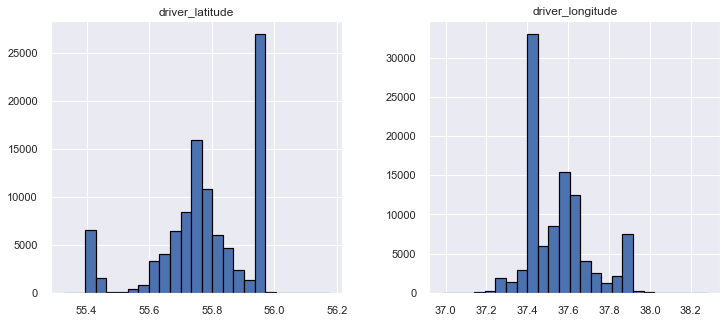

In [395]:
rcParams['figure.figsize'] = 12,5

df[df.driver_latitude > 10][['driver_latitude', 'driver_longitude']].hist(bins=25, edgecolor='black', linewidth=1.2)

In [396]:
# удалим не нужные элементы

idx_to_remove = list(df[df.driver_latitude < 10].index) # удаляю 141 элемент из таблицы
df.drop(index=idx_to_remove, inplace=True)

### origin_order_latitude, origin_order_longitude

Широта и долгота начала заказа. У 13 элементов в этих столбцах значение -1, т.е. отсутствует информация о позиции заказа - можно создать новый признак или удалить. Судя по графикам boxplot, у переменной origin_order_longitude есть выбросы.

In [397]:
idx_to_remove = list(df[df.origin_order_latitude < 10].index) # удаляю 13 элементов из таблицы
df.drop(index=idx_to_remove, inplace=True)

In [398]:
from math import radians, cos, sin, asin, sqrt 

# Функция преобразовывающая координаты в расстояние в км
def distance(lat1, lon1, lat2, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers.
    r = 6371
       
    # calculate the result 
    return(c * r)

In [399]:
distance_to_order = []

for i in df.index:
    lat1 = df.loc[i, 'driver_latitude']
    lon1 = df.loc[i, 'driver_longitude']
    lat2 = df.loc[i, 'origin_order_latitude']
    lon2 = df.loc[i, 'origin_order_longitude']
    distance_to_order.append(distance(lat1, lon1, lat2, lon2))

df['distance_to_order'] = distance_to_order

### distance_km

Estimated distance from origin to destination in kilometres (FLOAT). Value -1 means that the destination is not set. Большое количество элементов, у которых не определено расстояние (значение -1) 26207 (26,2% от общего количества значений);

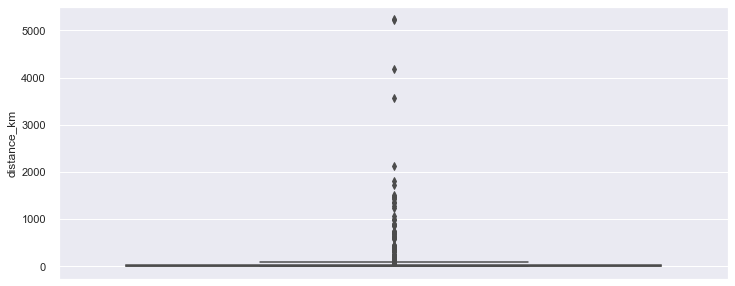

In [400]:
sns.boxplot(y=df[df.distance_km > 0].distance_km, color="limegreen")

In [401]:
len(df[df.distance_km >= 500])
len(df[df.distance_km >= 90])

38

338

Text(0.5, 1.0, 'График для параметра distance_km')

Text(0.5, 0, 'distance_km')

Text(0, 0.5, 'Количество элементов')

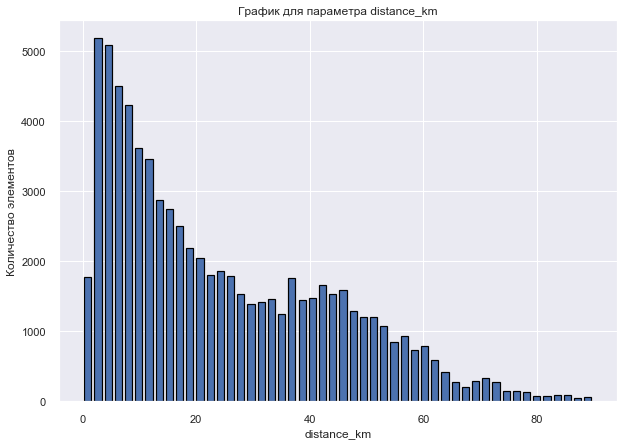

In [402]:
rcParams['figure.figsize'] = 10,7

df.query('distance_km > 0 & distance_km < 90').distance_km.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра distance_km')
plt.xlabel('distance_km')
plt.ylabel('Количество элементов')

In [403]:
# Исключаем очень длительные поездки: более 90 км, более более 90 мин.

idx_to_remove = list(df[df.distance_km >= 90].index)
df.drop(index=idx_to_remove, inplace=True)

In [404]:
idx_to_remove = list(df[df.duration_min >= 90].index) # удаляю 18 элементов из таблицы 
df.drop(index=idx_to_remove, inplace=True)

In [405]:
idx_to_remove = list(df[df.distance_km == 0].index) # удаляю 152 элемента из таблицы
df.drop(index=idx_to_remove, inplace=True)

In [406]:
def destination_not_set(num):
    if num == -1: return 1
    else: return 0

In [407]:
df["dest_not_set"] = df["distance_km"].apply(destination_not_set)

### duration_min

Etimated duration from origin to destination in minutes (FLOAT). Value -1 means that the destination is not set. Большое количество элементов, у которых не определена длительность (значение -1) 26207 (26,2% от общего количества значений);

In [408]:
len(df.duration_min.unique())
df.duration_min.value_counts()

4551

-1.000     26083
 21.467       65
 56.833       64
 23.333       56
 29.617       55
           ...  
 65.417        1
 73.800        1
 1.217         1
 64.867        1
 69.033        1
Name: duration_min, Length: 4551, dtype: int64

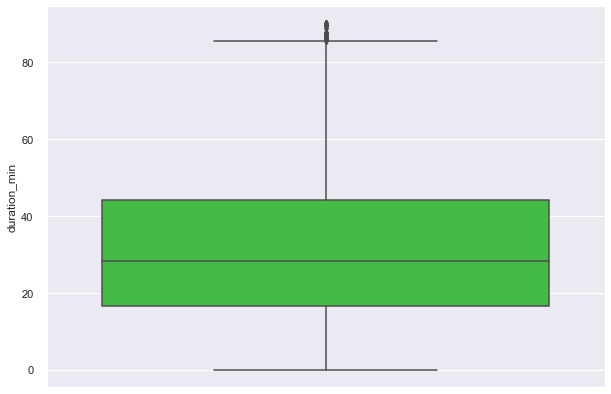

In [409]:
sns.boxplot(y=df[df.duration_min > 0].duration_min, color="limegreen")

In [410]:
len(df[df.duration_min >= 500])
len(df[df.duration_min >= 90])

0

0

Text(0.5, 1.0, 'График для параметра duration_min')

Text(0.5, 0, 'duration_min')

Text(0, 0.5, 'Количество элементов')

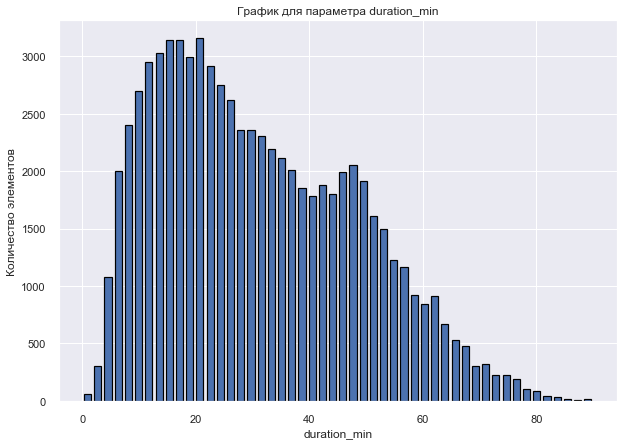

In [411]:
rcParams['figure.figsize'] = 10,7

df.query('duration_min > 0 & duration_min < 90').duration_min.hist(bins=50, edgecolor='black', linewidth=1.2, align='mid', rwidth=0.7)

plt.title('График для параметра duration_min')
plt.xlabel('duration_min')
plt.ylabel('Количество элементов')

In [412]:
df.drop(columns='duration_min', inplace=True)

### offer_class_group

В датасете 9 уникальных категорий заказов, при этом на топ-4 категории приходится 98,7% от всех элементов: Economy-48335, Standard-47288, Premium-1773, Delivery-1290.

In [413]:
len(df.offer_class_group.unique())
df.offer_class_group.unique()
df.offer_class_group.value_counts()

9

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

Economy     48045
Standard    46956
Premium      1754
Delivery     1282
Kids          586
XL            457
VIP           221
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

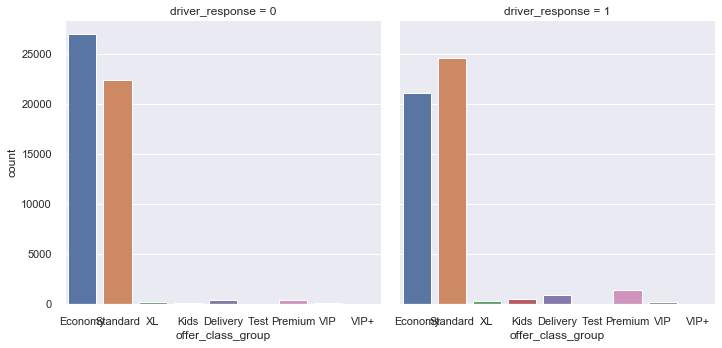

In [414]:
sns.set(style="darkgrid")
sns.catplot(x="offer_class_group", data=df, col="driver_response", kind="count")

In [415]:
def converter(series):
    unique = series.unique().tolist()
    new_series = []
    
    for i in series.index:
        val = unique.index(series.loc[i])
        new_series.append(val)
        
    return new_series

In [416]:
offer_class_group_int = converter(df.offer_class_group)
df['offer_class_group_int'] = offer_class_group_int

### ride_type_desc

В датасете 4 уникальные типа поездки, при этом на топ-2 категории приходится 99,7% от всех элементов: private-91207, business-8533.

In [417]:
# ride_type_desc

len(df.ride_type_desc.unique())
df.ride_type_desc.unique()
df.ride_type_desc.value_counts()

4

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

private      90675
business      8403
affiliate      224
SMB             36
Name: ride_type_desc, dtype: int64

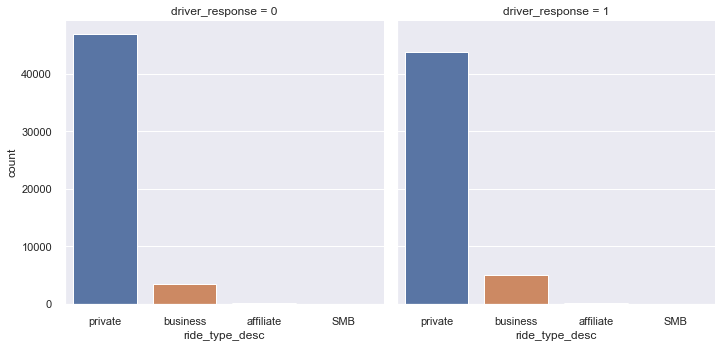

In [418]:
# Распределение откликов водителей по типам заказа (sns.catplot)

sns.set(style="darkgrid")
sns.catplot(x="ride_type_desc", data=df, col="driver_response", kind="count")

In [419]:
ride_type_desc_int = converter(df.ride_type_desc)
df['ride_type_desc_int'] = ride_type_desc_int

In [420]:
df = df.drop(['offer_class_group', 'ride_type_desc'], axis=1)

# Зависимости переменных между собой.

In [421]:
df.head()

,offer_gk,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,driver_response,is_weekend,is_friday,is_night,is_morning,is_daytime,is_evening,distance_to_order,dest_not_set,offer_class_group_int,ride_type_desc_int
0,1105373,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,0,0,1,0,0,0,1,1.363045,1,0,0
1,759733,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,1,0,1,0,0,1,0,3.413092,0,1,0
2,416977,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,0,1,0,0,0,1,0,0.409999,0,0,0
3,889660,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,1,0,0,0,1,0,0,0.647472,1,0,0
4,1120055,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,1,0,0,0,0,1,0,1.062481,0,0,0


In [422]:
correlations = df.corr() # Матрица корреляций до преобразования данных
correlations.style.background_gradient(cmap='coolwarm').set_precision(3)

,offer_gk,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,driver_response,is_weekend,is_friday,is_night,is_morning,is_daytime,is_evening,distance_to_order,dest_not_set,offer_class_group_int,ride_type_desc_int
offer_gk,1,0.00147,0.00365,0.00039,-0.00576,0.000319,-0.00514,0.00125,0.00512,-0.00769,-0.00175,0.00475,0.00494,-0.001,-0.00655,0.00422,0.0019,0.00223,0.00153
driver_gk,0.00147,1,-0.0042,-0.143,0.115,-0.144,0.117,-0.0232,0.015,0.0132,0.00679,0.0105,0.033,0.0178,-0.0481,0.0868,-0.0133,0.00613,-0.0127
order_gk,0.00365,-0.0042,1,0.00833,-0.00617,0.00865,-0.00623,0.00302,0.00168,0.00163,0.00541,-0.00816,-0.000502,-0.000437,0.00645,-0.00308,-0.00653,0.00273,-0.00995
driver_latitude,0.00039,-0.143,0.00833,1,-0.692,0.998,-0.698,-0.00595,-0.201,0.0102,-0.0494,-0.0116,-0.0111,-0.101,0.096,-0.245,-0.000113,-0.0137,0.0117
driver_longitude,-0.00576,0.115,-0.00617,-0.692,1,-0.694,0.996,0.0315,0.163,0.012,0.0301,0.0432,-0.0246,0.0522,-0.0512,0.143,0.00257,0.0138,-0.00533
origin_order_latitude,0.000319,-0.144,0.00865,0.998,-0.694,1,-0.7,-0.00997,-0.197,0.00914,-0.0489,-0.0151,-0.00967,-0.0993,0.0962,-0.253,-0.000482,-0.0133,0.0111
origin_order_longitude,-0.00514,0.117,-0.00623,-0.698,0.996,-0.7,1,0.0354,0.162,0.0123,0.0296,0.0465,-0.0253,0.051,-0.0519,0.15,0.0028,0.0138,-0.00594
distance_km,0.00125,-0.0232,0.00302,-0.00595,0.0315,-0.00997,0.0354,1,-0.306,0.0788,-0.0263,0.131,-0.0515,-0.111,0.0368,-0.0976,-0.56,-0.107,-0.276
driver_response,0.00512,0.015,0.00168,-0.201,0.163,-0.197,0.162,-0.306,1,-0.0354,-0.0149,-0.133,0.0755,0.155,-0.0901,0.0816,0.0674,0.131,0.0553
is_weekend,-0.00769,0.0132,0.00163,0.0102,0.012,0.00914,0.0123,0.0788,-0.0354,1,-0.319,0.0963,-0.0603,9.69e-05,-0.0184,0.00153,-0.0363,-0.0311,-0.0896


In [439]:
# Посмотрим, у скольких элементов корреляция > 70% 
row = 0
for element in np.triu(correlations, k = 1):
    row += 1
    place = 0
    for number in element:
        place+=1
        if abs(number) > 0.7: print(f'Номер строки {row}, элемент {place}: коэффициент корреляции {round(number,5)}')

Номер строки 4, элемент 6: коэффициент корреляции 0.99847
Номер строки 5, элемент 7: коэффициент корреляции 0.99555
Номер строки 6, элемент 7: коэффициент корреляции -0.70046


In [447]:
X = df.drop('driver_response', axis=1)
y = df.driver_response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [448]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Accuracy: 0.7640426816992149


Модел дала результат с точностью 76% - это неплохо результат, который показывает, что мы верно преоброзовывали метрики и оставили только необходимые признаки, и что их колличество приемлемо.